<a href="https://colab.research.google.com/github/akulkarni14/SDL-Practicals/blob/main/S%26DL_PR3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
130/130 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.7684 - loss: 0.4655 - val_accuracy: 0.9874 - val_loss: 0.0624
Epoch 2/10
130/130 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9932 - loss: 0.0328 - val_accuracy: 0.9884 - val_loss: 0.0290
Epoch 3/10
130/130 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9989 - loss: 0.0078 - val_accuracy: 0.9903 - val_loss: 0.0273
Epoch 4/10
130/130 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.9989 - loss: 0.0076 - val_accuracy: 0.9894 - val_loss: 0.0251
Epoch 5/10
130/130 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9993 - loss: 0.0027 - val_accuracy: 0.9865 - val_loss: 0.0274
Epoch 6/10
130/130 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9999 - loss: 0.0015 - val_accuracy: 0.9874 - val_loss: 0.0282
Epoch 7/10
130/130 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.9998 - loss: 0.0017 - val_accuracy: 0.9845 - val_loss: 0.0297
Epoch 8/10
130/130 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9996 - loss: 0.0025 - val_accu

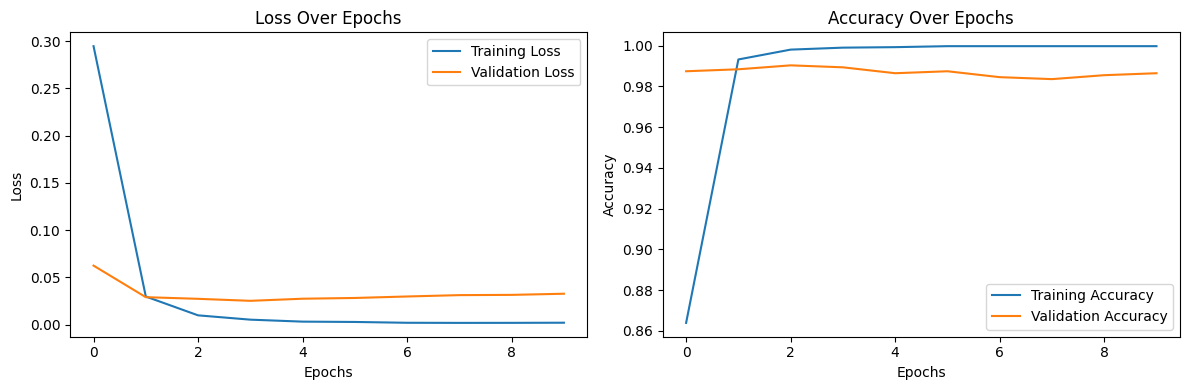

In [2]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import matplotlib.pyplot as plt

# Load and clean dataset
df = pd.read_csv('/content/spam_ham_dataset.csv')
df = df.drop(columns=['Unnamed: 0', 'label'])  # Drop unused columns

# Features and labels
X = df['text']
y = df['label_num']

# Convert text to TF-IDF features
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X_tfidf = vectorizer.fit_transform(X).toarray()

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_tfidf, y, test_size=0.2, random_state=42, stratify=y
)

# Build the neural network model
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))  # Sigmoid for binary classification

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=32,
    validation_data=(X_test, y_test),
    verbose=1
)

# Predict on test set
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Plot loss and accuracy over epochs
plt.figure(figsize=(12, 4))

# Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Over Epochs')
plt.legend()

# Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy Over Epochs')
plt.legend()

plt.tight_layout()
plt.show()
